# CIFAR-10 Image Classification using Convolutional Neural Networks

## Description

The CIFAR-10 dataset is a collection of 60,000 32x32 color images, with each of the images falling into one of ten different categories. These categories are: airplanes, automobiles, birds, cats, deers, dogs, frogs, horses, ships, and trucks. Using this dataset, I created a convolutional neural network to create a machine learning image classifier to classify 10,000 of the images to the correct categorical label. 

## Code

In [17]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [18]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential

In [12]:
# Load dataset from Keras
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

For this model,

In [13]:
# One-Hot Encoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [23]:
from keras import layers
model = keras.Sequential([
    layers.Conv2D(64, 7, activation = 'relu', input_shape = (32, 32, 3)),
    layers.MaxPool2D(pool_size = (2, 2), strides = 2),

    
    layers.Conv2D(128, 3, activation = 'relu'),
    layers.MaxPool2D(pool_size = (2, 2), strides = 2),

    
    layers.Conv2D(256, 3, activation = 'relu'),
    layers.MaxPool2D(pool_size = (2, 2), strides = 2),
    
    layers.Flatten(),
    layers.Dropout(0.5),
    
    layers.Dense(10, activation = 'softmax'),
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 64)        9472      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 5, 5, 128)         0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 3, 256)         295168    
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 1, 1, 256)        

In [24]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

CIFAR = model.fit(x_train, y_train, batch_size=32, epochs=25, validation_split=0.2, callbacks=[EarlyStopping(monitor='loss', patience=3)])

Epoch 1/25
1250/1250 [==============================] - 15s 12ms/step - loss: 2.1486 - accuracy: 0.2640 - val_loss: 1.7803 - val_accuracy: 0.3426
Epoch 2/25
1250/1250 [==============================] - 14s 11ms/step - loss: 1.7889 - accuracy: 0.3531 - val_loss: 1.8409 - val_accuracy: 0.3538
Epoch 3/25
1250/1250 [==============================] - 14s 11ms/step - loss: 1.7201 - accuracy: 0.3782 - val_loss: 1.7534 - val_accuracy: 0.3547
Epoch 4/25
1250/1250 [==============================] - 14s 11ms/step - loss: 1.6728 - accuracy: 0.3963 - val_loss: 1.5598 - val_accuracy: 0.4398
Epoch 5/25
1250/1250 [==============================] - 14s 11ms/step - loss: 1.6493 - accuracy: 0.4099 - val_loss: 1.5794 - val_accuracy: 0.4277
Epoch 6/25
1250/1250 [==============================] - 14s 11ms/step - loss: 1.6093 - accuracy: 0.4238 - val_loss: 1.6643 - val_accuracy: 0.4008
Epoch 7/25
1250/1250 [==============================] - 14s 12ms/step - loss: 1.5953 - accuracy: 0.4305 - val_loss: 1.6083 -

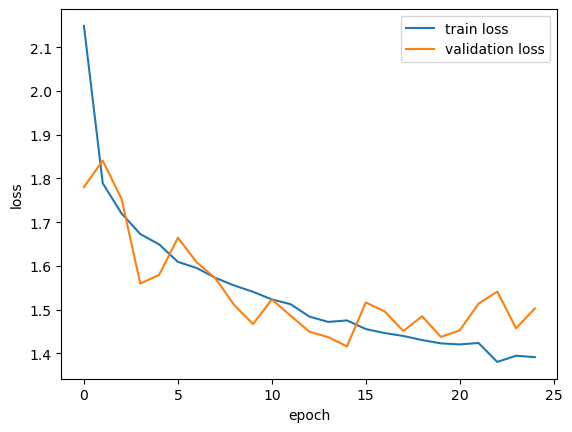

In [25]:
plt.plot(CIFAR.history['loss'], label='train loss')
plt.plot(CIFAR.history['val_loss'], label='validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

In [26]:
loss, acc = model.evaluate(x_train, y_train, verbose=0)

print("Train accuracy:", acc)

loss, acc = model.evaluate(x_test, y_test, verbose=0)

print("Test accuracy:", acc)

Train accuracy: 0.5607600212097168
Test accuracy: 0.49390000104904175
